### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [5]:
# Load the dataset turtle_reviews.csv
df = pd.read_csv('turtle_reviews.csv')


# View the top rows of the dataframe
df.head()



,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [6]:
#Viewing the last 5 rows of the data frame
df.tail()


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars
1999,Male,32,92.66,8,479,PhD,EN,Web,453,This game is fun. A lot like scrabble without ...,Love this game


In [7]:
# Checking if there are any missing values
df.isna().sum()
# This output clearly shows there are no missing values

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [8]:
# Explore the data further
# displaying the metadata of the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [11]:
# Descriptive statistics.
df.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


#### All the standard data sense checking have been achieved in the above steps. Observations made are :1. There are no missing values,2000 total rows and 11 total columns.

## 2. Drop columns

In [13]:
# Drop unnecessary columns.
df.drop(columns=['language','platform'],inplace=True)

# View column names.
df.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 3. Rename columns

In [15]:
# Rename the column headers.

df.rename(columns={'remuneration (k£)':'remuneration','spending_score (1-100)':'spending_score'},inplace=True)
# View column names.
df.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 4. Save the DataFrame as a CSV file

In [57]:
# Create a CSV file as output.
df.to_csv('turtle_reviews_clean.csv',index=False)

In [58]:
# Import new CSV file with Pandas.

df1 = pd.read_csv('turtle_reviews_clean.csv')
# View DataFrame.
df1

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [59]:
# sense checking on the new dataset
df1.shape


(2000, 9)

In [60]:
# displaying the metadata
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


#### Two columns which were irrelevant were dropped and 2 more columns were renamed appropriately. The cleaned version dataframe was saved to a .csv format and then imported into a new dataframe for further analysis.

In [61]:
df1.corr()

,age,remuneration,spending_score,loyalty_points,product
age,1.000000,-0.005708,-0.224334,-0.042445,0.003081
remuneration,-0.005708,1.000000,0.005612,0.616065,0.305309
spending_score,-0.224334,0.005612,1.000000,0.672310,-0.001649
loyalty_points,-0.042445,0.616065,0.672310,1.000000,0.183600
product,0.003081,0.305309,-0.001649,0.183600,1.000000


In [245]:
dft2 = df1[['remuneration','age']]
dft2.head()

,remuneration,age
0,12.30,18
1,12.30,23
2,13.12,22
3,13.12,25
4,13.94,33


In [246]:
dft2.corr()

,remuneration,age
remuneration,1.000000,-0.005708
age,-0.005708,1.000000


In [243]:
dft3 = df1[['spending_score','remuneration']]
dft3.head()

,spending_score,remuneration
0,39,12.30
1,81,12.30
2,6,13.12
3,77,13.12
4,40,13.94


In [244]:
dft3.corr()

,spending_score,remuneration
spending_score,1.000000,0.005612
remuneration,0.005612,1.000000


In [247]:
dft4 = df1[['spending_score','age']]
dft4.head()

,spending_score,age
0,39,18
1,81,23
2,6,22
3,77,25
4,40,33


In [248]:
dft4.corr()

,spending_score,age
spending_score,1.000000,-0.224334
age,-0.224334,1.000000


#### I am trying to establish a correlation among the dependent variables. As we could see, there is no positive correlation between Age and spending score. Same goes with Age and remuneration. There is correlation between spending score and remuneration but it is insignificant.

## 5. Linear regression

#### Independent variable is chosen as Loyalty_points which is what were are trying predict values for and the dependent variable here is chosen as spending score. Then a scatter plot is plotted to check the Linearity of the dataset. Oridinary Least Squares(OLS) method is used to fit. Then a summary table is printed which will have important values to consider. The paramaeters are printed and the coefficient and contsants are selected to produce predicted values. Using the predicted values then the line of regression (Line of best fit is plotted)

### 5a) spending vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          2.92e-263
Time:                        10:09:30   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

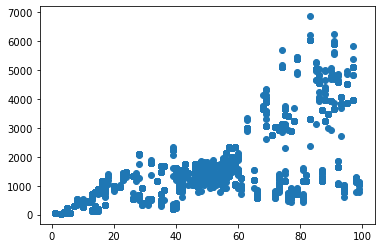

In [67]:
# Independent variable.
#Declaring the Independent variable y as loyalty_points
y = df1['loyalty_points']

# Dependent variable.
# Declaring the dependent variable x as spending_score
x = df1['spending_score']
# plot
plt.scatter(x,y)

# OLS model and summary.
# fit the OLS model
f = 'y~x'
model_spl =  ols(f, data = df1).fit()

# View the summary
model_spl.summary()


In [68]:
# Extract the estimated parameters.
 
print(" parameters :",model_spl.params)
# Extract the standard errors.
print(" standard errors:",model_spl.bse)

# Extract the predicted values.
print("Predicted values",model_spl.predict())

 parameters : Intercept   -75.052663
x            33.061693
dtype: float64
 standard errors: Intercept    45.930554
x             0.814419
dtype: float64
Predicted values [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [69]:
# Set the X coefficient and the constant to generate the regression table.
# x coef: 33.0617
# Constant coef: -75.0527
# Create the linear equation
y_predicted = -75.0527 + 33.0617 * x

# View the output.
y_predicted

0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spending_score, Length: 2000, dtype: float64

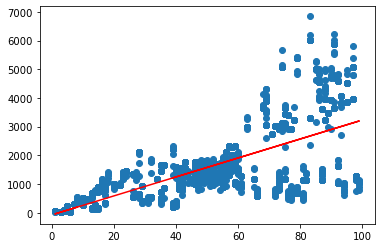

In [70]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(x, y)

# Plot the line.
plt.plot(x, y_predicted, color='red')


#### Observations and interpretations: The data points are not strongly linear, as there are outliers. R^2  expalins that the variabiltiy of the model is 45%.The intercept being negative is insignificant, x coefficient is 33.0617, means that every 1 unit increases the predicted value would increase by 33.0617. F-stat values is below the value of 0.05, which suggests that the regression model is significant. t- value is calculated by coeff / std error. So when the std error is smaller the better. Here std error is smaller.Std erro is also inversely proportional to t- value. The last 2 values are the confident intervals which suggests that 95% of chances are the values predicted wpould be between 31.4 & 34.65. The observation sample is also not too small(n= 2000).
#### This model suggests that as the spending score increases it  increases chances of accumulating loyalty points.


### 5b) renumeration vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          2.43e-209
Time:                        10:10:02   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

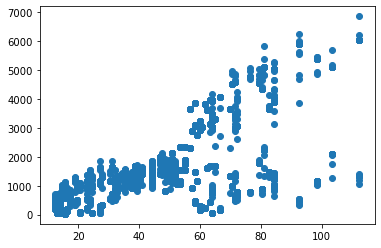

In [71]:
# Independent variable.
#Declaring the Independent variable y as loyalty_points
y = df1['loyalty_points']

# Dependent variable.
# Declaring the dependent variable x as remuneration
x = df1['remuneration']
# plot
plt.scatter(x,y)

# OLS model and summary.
# fit the OLS model
f = 'y~x'
model_rml =  ols(f, data = df1).fit()

# View the summary
model_rml.summary()

In [72]:
# Extract the estimated parameters.
 
print(" parameters :",model_rml.params)
# Extract the standard errors.
print(" standard errors:",model_rml.bse)

# Extract the predicted values.
print("Predicted values",model_rml.predict())

 parameters : Intercept   -65.686513
x            34.187825
dtype: float64
 standard errors: Intercept    52.170717
x             0.977925
dtype: float64
Predicted values [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [73]:
# Set the X coefficient and the constant to generate the regression table.
# x coef: 34.187825
# Constant coef: -65.686513
# Create the linear equation
y_predicted = -65.686513 + 34.187825 * x

# View the output.
y_predicted

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

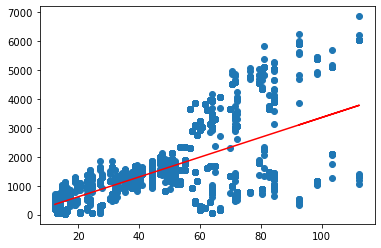

In [74]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(x, y)

# Plot the line.
plt.plot(x, y_predicted, color='red')


#### Observations and interpretations: The data points are not strongly linear, as there are outliers. R^2  expalins that the variabiltiy of the model is 38%.The intercept being negative is insignificant, x coefficient is 34.18, means that every 1 unit increases the predicted value would increase by 34.18. F-stat values is below the value of 0.05, which suggests that the regression model is significant. t- value is calculated by coeff / std error. So when the std error is smaller the better. Here std error is smaller.Std erro is also inversely proportional to t- value. The last 2 values are the confident intervals which suggests that 95% of chances are the values predicted wpould be between 32.27 &36.10. The observation sample is also not too small(n= 2000).
#### This model suggests that as the remuneration increases it slightly increases chances of accumulating loyalty points.

### 5c) age vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 08 Oct 2023   Prob (F-statistic):             0.0577
Time:                        10:10:30   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x1            -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

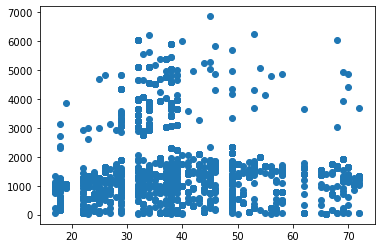

In [75]:
# Independent variable.
#Declaring the Independent variable y as loyalty_points
y1 = df1['loyalty_points']

# Dependent variable.
# Declaring the dependent variable x as age
x1 = df1['age']
# plot
plt.scatter(x1,y1)

# OLS model and summary.
# fit the OLS model
f = 'y1~x1'
model_al =  ols(f, data = df1).fit()

# View the summary
model_al.summary()

In [76]:
# Extract the estimated parameters.
 
print(" parameters :",model_al.params)
# Extract the standard errors.
print(" standard errors:",model_al.bse)

# Extract the predicted values.
print("Predicted values",model_al.predict())

 parameters : Intercept    1736.517739
x1             -4.012805
dtype: float64
 standard errors: Intercept    88.248731
x1            2.113177
dtype: float64
Predicted values [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [79]:
# Set the X coefficient and the constant to generate the regression table.
# x coef: -4.012805
# Constant coef: 1736.517739
# Create the linear equation
y1_predicted = 1736.517739 + -4.012805 * x

# View the output.
y1_predicted

0       1687.160237
1       1687.160237
2       1683.869737
3       1683.869737
4       1680.579237
           ...     
1995    1397.596229
1996    1364.691228
1997    1364.691228
1998    1341.657727
1999    1364.691228
Name: remuneration, Length: 2000, dtype: float64

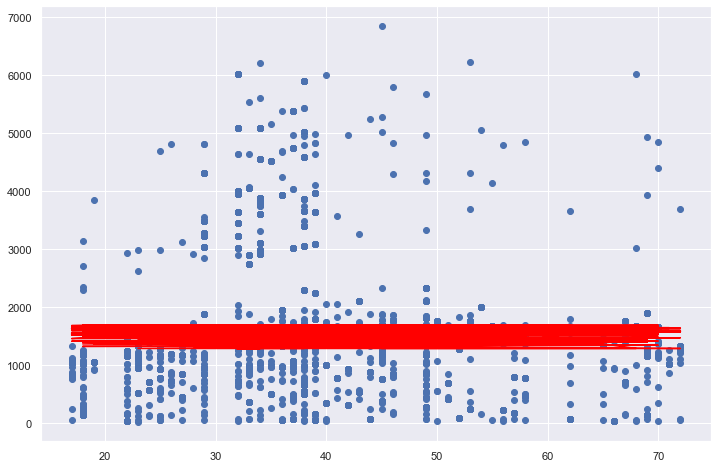

In [242]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(x1, y1)

# Plot the line.
plt.plot(x1, y1_predicted, color='red')


## 6. Observations and insights

***Your observations here...***






#### As explained above in the regression analysis of spending vs loyalty points and remuneration vs loaylty, the model were able to predict variability by 45% and 38% respectievely. There were signs of earning loyalty points on increase of spending score and by slight increase in accumulating points by remuneration.
#### However ther very much strong indication that Age is not factor in indicating loyalty points and we could confidently dismiss the regression model as it is not significamt regression model. The R^2 value is insignificant as the coefficients are.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [54]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [84]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
df2.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [91]:
# Drop unnecessary columns.
df_new = df2.drop(columns=['age','loyalty_points','education','product','review','summary'])

# View DataFrame.
df_new

,gender,remuneration,spending_score
0,Male,12.30,39
1,Male,12.30,81
2,Female,13.12,6
3,Female,13.12,77
4,Female,13.94,40
...,...,...,...
1995,Female,84.46,69
1996,Female,92.66,8
1997,Male,92.66,91
1998,Male,98.40,16


In [ ]:
# Explore the data.


In [87]:
# Descriptive statistics.
df_new.describe()


,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

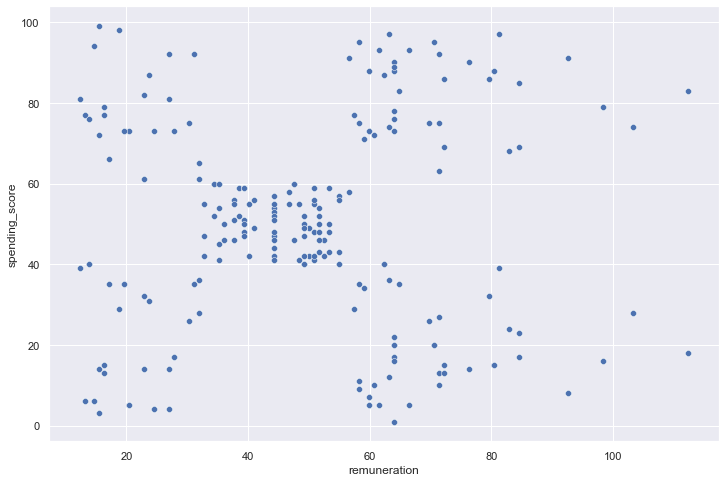

In [116]:
# Create a scatterplot with Seaborn.
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df_new)
                

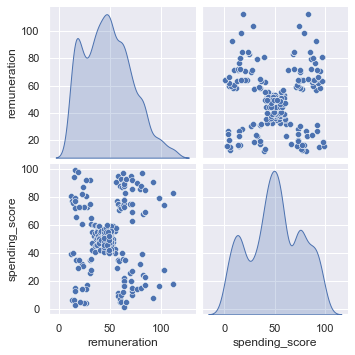

In [117]:
# Create a pairplot with Seaborn.
x = df_new[['remuneration', 'spending_score']]

sns.pairplot(df_new,
             vars=x,
             diag_kind='kde')

## 3. Elbow and silhoutte methods

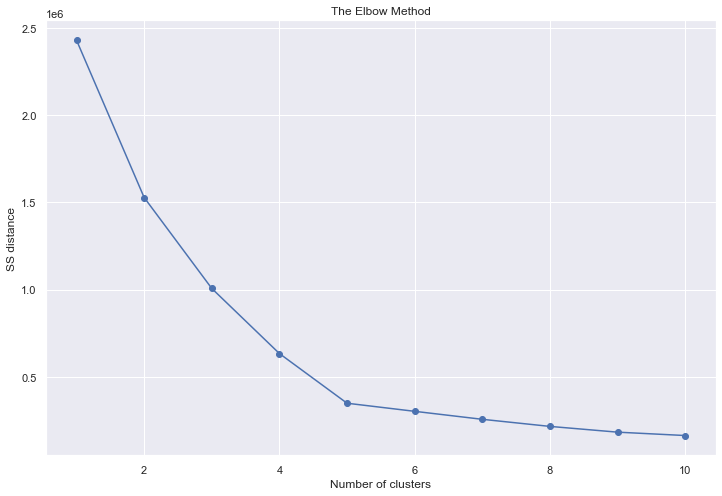

In [118]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()


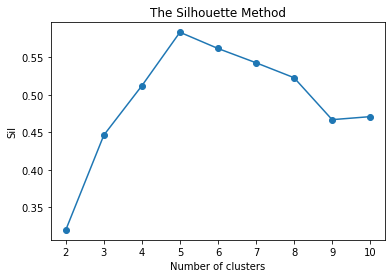

In [98]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

### Based on the Elbow method and silhouette method, I am trying for k=4,5,6. In Silhouette method the value closer to +1 is better, so here it is clearly 5.

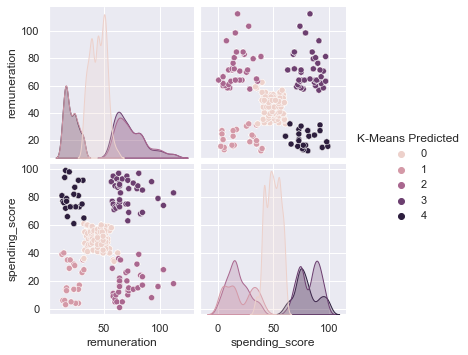

In [119]:
# Evalutaing with k=5
# Use three clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [120]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [121]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

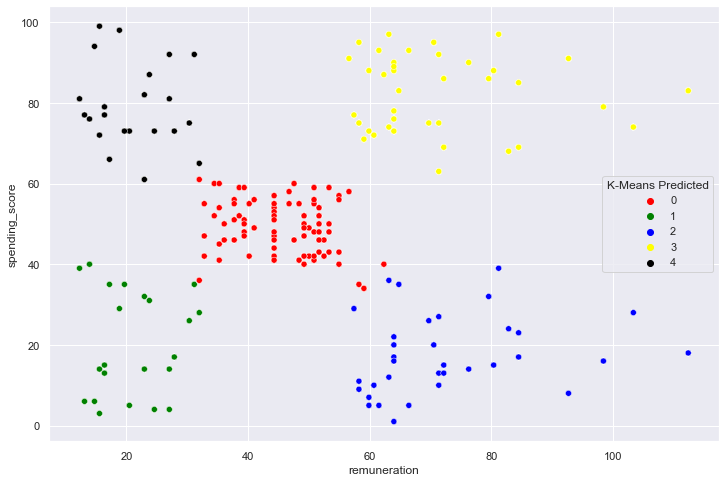

In [123]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue','yellow','black'])

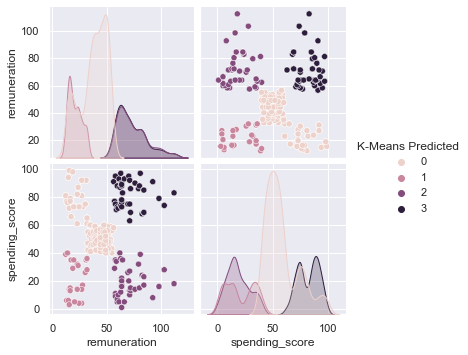

In [124]:
# Evalutaing with k=4
# Use three clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [125]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

In [126]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  0
2         13.12               6                  1
3         13.12              77                  0
4         13.94              40                  1


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

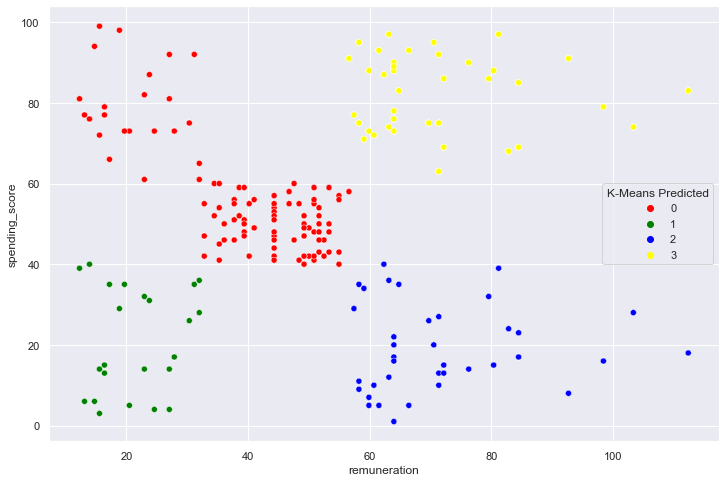

In [127]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue','yellow'])

## 5. Fit final model and justify your choice

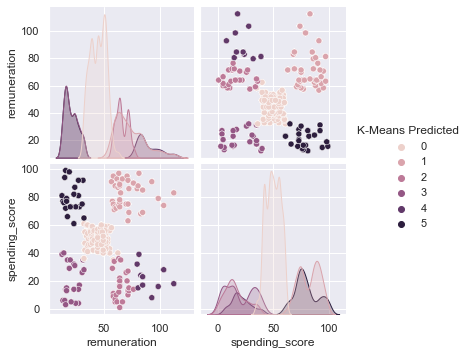

In [128]:
# Apply the final model with 6 clusters.
# Evalutaing with k=6
# Use three clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')


In [129]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()


0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

In [130]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  5
2         13.12               6                  3
3         13.12              77                  5
4         13.94              40                  3


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

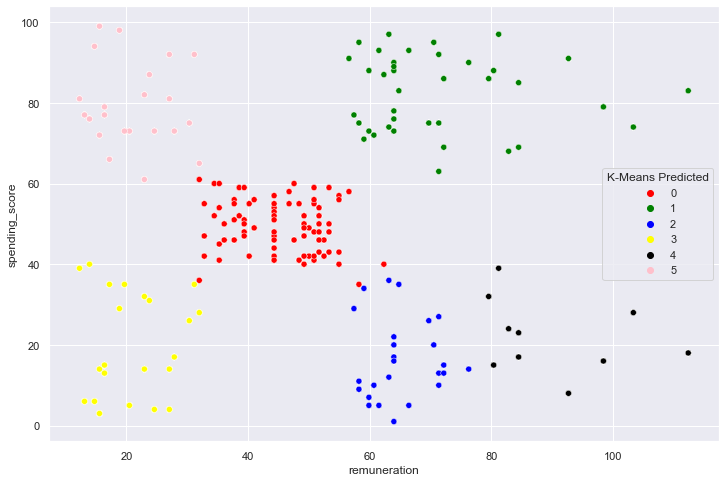

In [132]:
#Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue','yellow','black','pink'])


## 7. Discuss: Insights and observations

***Your observations here...***

#### First, the dataset is imported to the dataframe. Then the un necessary columns are dropped and sense checked for. Then the data is plotted on the 2 variables which we are comparing remunerations and spending scores, on scatter plots and pair plot. There are clear distictions and pattern of remuneration and spending score in the pair plot. As we do not have any known groups of columns apart from remuneration and spending scores, apllying Elbow method & Silhouette method to identify the probable number of clusters required. As the methods suggest, the values closer to +1 is better in Silhouette method, select 5 as the first number of cluster to work on. Then 4 & 6 respectievely. I choose the ideal number of k means to be 5 cluster and 0 group has the largest objects gathered with a very close distance from the sum of squares.


# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [152]:
# Import all the necessary packages.

!pip install WordCloud
!pip install nltk
!pip install textblob

import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
import re



# Install the required tokenisation model.
nltk.download('punkt')

# Install the required tokenisation function.
from nltk.tokenize import sent_tokenize


#
#nltk.download('punkt').
nltk.download('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\reach\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reach\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [142]:
# Load the data set as df3.

# Load the CSV file(s) as df3.
df3 = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
df3.head()
# View DataFrame.


,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [143]:
# Explore data set.
df3.isna().sum()


gender            0
age               0
remuneration      0
spending_score    0
loyalty_points    0
education         0
product           0
review            0
summary           0
dtype: int64

In [148]:
# Keep necessary columns. Drop unnecessary columns.

df_nlp = df3.drop(columns=['gender','age','remuneration','spending_score','loyalty_points','education','product'])
# View DataFrame.
df_nlp.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


#### The appropriate libraries are imported,packages installed. The dataset is loaded. The usual sense check process is carried out.Data wrangling and manipulations carried out.

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [149]:
# Review: Change all to lower case and join with a space.
df_nlp['review'] = df_nlp['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# view review column
df_nlp['review'].head()


0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [150]:
# Summary: Change all to lower case and join with a space.
df_nlp['summary'] = df_nlp['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# view review column
df_nlp['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [161]:
# Replace all the punctuations in review column.

df_nlp['review'] = df_nlp['review'].str.replace('[^\w\s]','')

# View output.
print(df_nlp['review'])

                                                 review
0     when it comes to a dm's screen, the space on t...
1     an open letter to galeforce9*: your unpainted ...
2     nice art, nice printing. why two panels are fi...
3     amazing buy! bought it as a gift for our new d...
4     as my review of gf9's previous screens these w...
...                                                 ...
1995  the perfect word game for mixed ages (with mom...
1996  great game. did not think i would like it when...
1997  great game for all......... keeps the mind nim...
1998                                          fun game!
1999  this game is fun. a lot like scrabble without ...

[2000 rows x 1 columns]
0       when it comes to a dms screen the space on the...
1       an open letter to galeforce9 your unpainted mi...
2       nice art nice printing why two panels are fill...
3       amazing buy bought it as a gift for our new dm...
4       as my review of gf9s previous screens these we...
             

In [162]:
# Replace all the puncuations in summary column.
df_nlp['summary'] = df_nlp['summary'].str.replace('[^\w\s]','')

# View output.
print(df_nlp['summary'])

# View output.


0       the fact that 50 of this space is wasted on ar...
1       another worthless dungeon masters screen from ...
2                          pretty but also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1995        the perfect word game for mixed ages with mom
1996                                            super fun
1997                                           great game
1998                                           four stars
1999                                       love this game
Name: summary, Length: 2000, dtype: object


### 2c) Drop duplicates in review column

In [163]:
# review dups count

df_nlp.review.duplicated().sum()




50

In [164]:
# summary dups count
df_nlp.summary.duplicated().sum()

649

In [168]:
# review duplicates
reviews = df_nlp.drop_duplicates(subset=['review'])

# Preview data.
reviews.reset_index(inplace=True)
reviews.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [170]:
# summary duplicates
summ = df_nlp.drop_duplicates(subset=['review'])

# Preview data.
summ.reset_index(inplace=True)
summ.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


#### Above, the text is changed to lower case and joined with elements for bothnthe Review column and Summary column.

## 3. Tokenise and create wordclouds

In [171]:
# Create new DataFrame (copy DataFrame).
df_nlp_tkn = df_nlp

# View DataFrame.
df_nlp_tkn.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [179]:


# Applying tokenisation of 'review' column
reviews['token'] = review['review'].apply(word_tokenize)


# View DataFrame.
reviews['token'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: token, dtype: object

In [180]:
# Applying tokenisation of 'summary' column
summ['token'] = summ['summary'].apply(word_tokenize)
# view
summ['token'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: token, dtype: object

In [210]:
# concatenating into one string variable

# Create an empty string variable.
review_string = []
for i in range(reviews.shape[0]):
    # Add each comment.
    review_string_token = review_string_token + reviews['token'][i]
#print(review_string)
type(review_string_token)

list

In [211]:
# concatenating into one string variable

# Create an empty string variable.
summ_string = []
for i in range(summ.shape[0]):
    # Add each comment.
    summ_string_token = summ_string_token + summ['token'][i]
type(summ_string_token)

list

In [212]:
# review remove stopwords
review_filter = []
for each_word in review_string_token:
    if each_word not in english_stopwords:
        review_filter.append(each_word)

# Display the filtered list.      
print("Tokenised list without stopwords: {}".format(review_filter))

  

Tokenised list without stopwords: ['game', 'fun', 'lot', 'like', 'scrabble', 'without', 'little', 'tiles', 'lose', 'comes', 'dms', 'screen', 'space', 'screen', 'absolute', 'premium', 'fact', '50', 'space', 'wasted', 'art', 'terribly', 'informative', 'needed', 'art', 'well', 'makes', 'completely', 'useless', 'reason', 'gave', '2', 'stars', '1', 'technically', 'speaking', 'least', 'still', 'stand', 'block', 'notes', 'dice', 'rolls', 'drops', 'ball', 'completely', 'open', 'letter', 'galeforce9', 'unpainted', 'miniatures', 'bad', 'spell', 'cards', 'great', 'board', 'games', 'meh', 'dm', 'screens', 'however', 'freaking', 'terrible', 'im', 'still', 'waiting', 'single', 'screen', 'isnt', 'polluted', 'pointless', 'artwork', 'useful', 'referenceable', 'tables', 'youve', 'created', 'single', 'use', 'screen', 'useful', 'running', 'storm', 'kings', 'thunder', 'adventure', 'even', 'despite', 'fact', 'geared', 'adventure', 'path', 'usefulness', 'negligible', 'best', 'massive', 'swath', 'inner', 'pan

In [213]:
# remove stopwords for summary column
# review remove stopwords
summary_filter = []
for each_word in summ_string_token:
    if each_word not in english_stopwords:
        summary_filter.append(each_word)

# Display the filtered list.      
print("Tokenised list without stopwords: {}".format(summary_filter))


Tokenised list without stopwords: ['love', 'game', 'fact', '50', 'space', 'wasted', 'art', 'terribly', 'informative', 'needed', 'art', 'another', 'worthless', 'dungeon', 'masters', 'screen', 'galeforce9', 'pretty', 'also', 'pretty', 'useless', 'five', 'stars', 'money', 'trap', 'five', 'stars', 'best', 'gm', 'screen', 'ever', 'five', 'stars', 'great', 'could', 'even', 'better', 'another', 'missed', 'opportunity', 'value', 'add', 'product', 'line', 'five', 'stars', 'love', 'map', 'general', 'dm', 'screen', 'weak', 'game', 'fell', 'completely', 'flat', 'five', 'stars', 'good', 'book', 'buckley', 'card', 'mommer', 'advanced', 'good', 'gets', 'better', 'know', 'youre', 'getting', 'dont', 'bother', 'worst', 'value', 'ive', 'ever', 'seen', 'enough', 'product', 'good', 'product', 'temporary', 'tattoos', 'good', 'gift', 'huge', 'hit', 'gorgeous', 'pictures', 'five', 'stars', 'wonderful', 'designs', 'wow', 'great', 'coloring', 'book', 'nice', 'book', 'great', 'pictures', 'perfect', 'well', 'done

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [216]:
# Determine the frequency distribution of review column
review_fd = FreqDist(review_filter)
review_fd


FreqDist({'game': 1669, 'great': 579, 'fun': 550, 'one': 530, 'play': 502, 'like': 415, 'love': 322, 'really': 319, 'get': 319, 'cards': 301, ...})

In [217]:
# Determine the frequency distribution of summary column
summary_fd = FreqDist(summary_filter)
summary_fd

FreqDist({'stars': 420, 'five': 338, 'game': 320, 'great': 294, 'fun': 218, 'love': 93, 'good': 91, 'four': 56, 'like': 54, 'expansion': 52, ...})

In [218]:
# Import the Counter class for review column
from collections import Counter

# Generate a DataFrame from Counter.
review_counts = pd.DataFrame(Counter(review_filter).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# view
review_counts

,Frequency
Word,
game,1669
great,579
fun,550
one,530
play,502
like,415
love,322
really,319
get,319


In [219]:
# Import the Counter class for review column
from collections import Counter

# Generate a DataFrame from Counter.
summary_counts = pd.DataFrame(Counter(summary_filter).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# view
summary_counts

,Frequency
Word,
stars,420
five,338
game,320
great,294
fun,218
love,93
good,91
four,56
like,54


### 4d) Identify 15 most common words and polarity

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [238]:
review_polarity_df = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in review_filter}
df_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df3}

In [240]:
review_polarity_df

{'g a m e': {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 'f u n': {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 'l o t': {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 'l i k e': {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 's c r a b b l e': {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 'w i t h o u t': {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 'l i t t l e': {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 't i l e s': {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 'l o s e': {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 'c o m e s': {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 'd m s': {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 's c r e e n': {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 's p a c e': {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 'a b s o l u t e': {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 'p r e m i u m': {'neg': 0.0, '

In [235]:
# Run through a dictionary comprehension to take every cleaned comment for review column
# Next run the polarity score function on the string.
# This will return four values in a dictionary

summary_polarity_df = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in summary_filter}

In [236]:
# to find review polarity
# Convert the list of dictionary results to a Pandas DataFrame.


review_polarity = pd.DataFrame(review_polarity_df).T

# View the DataFrame.
review_polarity


,neg,neu,pos,compound
g a m e,0.0,0.0,0.0,0.0
f u n,0.0,0.0,0.0,0.0
l o t,0.0,0.0,0.0,0.0
l i k e,0.0,0.0,0.0,0.0
s c r a b b l e,0.0,0.0,0.0,0.0
...,...,...,...,...
a c t i v e,0.0,0.0,0.0,0.0
m o t h e r i n l a w,0.0,0.0,0.0,0.0
s t r i c t l y,0.0,0.0,0.0,0.0
a l e r t,0.0,0.0,0.0,0.0


In [ ]:
# to find summary polarity

In [ ]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [ ]:
# Determine polarity of both columns. 


# View output.


In [ ]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


In [ ]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [ ]:
# Top 20 negative reviews.


# View output.


In [ ]:
# Top 20 negative summaries.


# View output.


In [ ]:
# Top 20 positive reviews.


# View output.


In [ ]:
# Top 20 positive summaries.


# View output.


## 7. Discuss: Insights and observations

***Your observations here...***

#### Dataset has been imported, sense check carried out, the unnecessary columns have been deleted to retain only Review and Summary columns. Punctuations,stop words have been removed for both the columns. Dupliactes have been removed. 15 most frequent words have been identitifed from both the columns but unfortunately had to give up the rest of the process as I was receiving some vital erorrs due to which I could not procedd to the next step without rectifying. Unfortunately time was scarce so had to cease the process.

# 